<a href="https://colab.research.google.com/github/aranmani/machinelearning/blob/master/Bollinger_Bands.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This Code uses Bollinger Band when to Buy/Sell stocks **

In [ ]:
# import the libraris 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Load the data
from google.colab import files
files.upload()


Saving LAZR.csv to LAZR (2).csv


{'LAZR.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2020-02-18,10.550000,10.550000,10.550000,10.550000,10.550000,700\n2020-02-19,10.600000,10.650000,10.600000,10.600000,10.600000,54300\n2020-02-20,10.600000,10.600000,10.600000,10.600000,10.600000,100\n2020-02-21,10.600000,10.610000,10.600000,10.610000,10.610000,201300\n2020-02-24,10.600000,10.600000,10.510000,10.510000,10.510000,100300\n2020-02-25,10.580000,10.580000,10.580000,10.580000,10.580000,500\n2020-02-26,10.550000,10.550000,10.550000,10.550000,10.550000,62000\n2020-02-27,10.572000,10.572000,10.572000,10.572000,10.572000,500\n2020-02-28,10.520000,10.600000,10.490000,10.600000,10.600000,270600\n2020-03-02,10.595000,10.600000,10.575000,10.600000,10.600000,100000\n2020-03-03,10.600000,10.600000,10.600000,10.600000,10.600000,0\n2020-03-04,10.600000,10.600000,10.600000,10.600000,10.600000,1100\n2020-03-05,10.600000,10.600000,10.500000,10.600000,10.600000,4300\n2020-03-06,10.600000,10.600000,10.600000,10.600000,10.600000,0\n2020

In [ ]:
# Get the data
df = pd.read_csv('LAZR.csv')
# Set the index to be date
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Close,Adj Close,Volume
2020-02-18,2020-02-18,10.550000,10.550000,10.550000,10.550000,10.550000,700
2020-02-19,2020-02-19,10.600000,10.650000,10.600000,10.600000,10.600000,54300
2020-02-20,2020-02-20,10.600000,10.600000,10.600000,10.600000,10.600000,100
2020-02-21,2020-02-21,10.600000,10.610000,10.600000,10.610000,10.610000,201300
2020-02-24,2020-02-24,10.600000,10.600000,10.510000,10.510000,10.510000,100300
...,...,...,...,...,...,...,...
2021-02-08,2021-02-08,33.799999,34.830002,32.150002,32.750000,32.750000,9269700
2021-02-09,2021-02-09,32.650002,33.869999,31.530001,33.750000,33.750000,8473900
2021-02-10,2021-02-10,34.410000,35.700001,32.110001,33.720001,33.720001,8947200
2021-02-11,2021-02-11,33.599998,37.349998,33.180000,35.939999,35.939999,14806100


[]

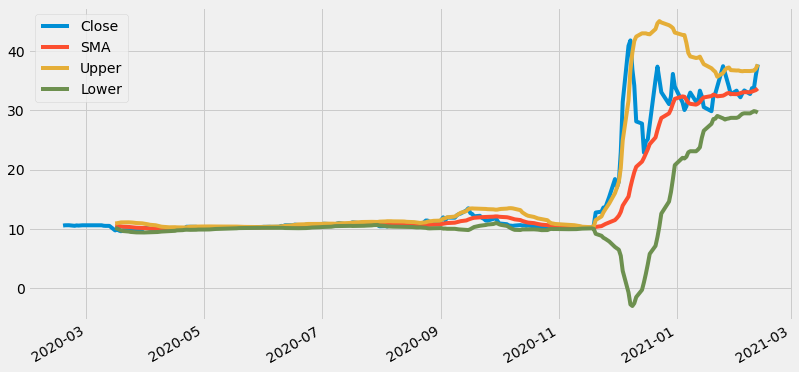

In [ ]:
# calculate Simple Moving Avg (SMA), Std. deviation, Upper band and Lower Band
# Get the time period (20 day)
period = 20
# Calculate the SMA 
df['SMA'] = df['Close'].rolling(window=period).mean()
# Get the standard deviation 
df['STD'] = df['Close'].rolling(window=period).std()
# Get the Upper Bollinger band
df['Upper'] = df['SMA'] + (df['STD'] * 2) 
# Get the Lower Bollinger band
df['Lower'] = df['SMA'] - (df['STD'] * 2) 

# Create a list of columns to keep
column_list = ['Close', 'SMA', 'Upper','Lower']
# Plot the data
df[column_list].plot(figsize=(12.2,6.4))
plt.title = 'Bollinger Band'
plt.ylabel = ('USD Price ($)')
plt.plot()

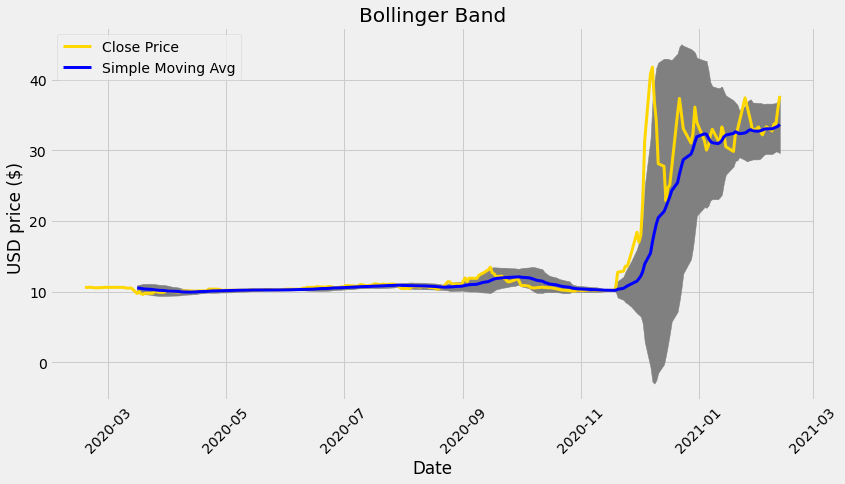

In [ ]:
# Plot and shade the area between two bollinger bands
fig = plt.figure(figsize=(12.2,6.4))
# Add the subplot 
ax = fig.add_subplot(1,1,1)
# get the index values of the data sub frame 
x_axis = df.index
# plot and shade the area between the upper band and the lower band grey
ax.fill_between(x_axis, df['Upper'], df['Lower'], color ='grey')
# plot the closing price and the moving avg.
ax.plot(x_axis, df['Close'], color = 'gold', lw = 3, label = 'Close Price')
ax.plot(x_axis, df['SMA'], color = 'blue', lw = 3, label = 'Simple Moving Avg')
# set the title and show the image
ax.set_title('Bollinger Band')
ax.set_xlabel('Date')
ax.set_ylabel('USD price ($) ')
plt.xticks(rotation = 45)
ax.legend()
plt.show()






In [ ]:
# Create a new data frame
new_df = df[period-1:]
# show the new data
new_df


,Date,Open,High,Low,Close,Adj Close,Volume,SMA,STD,Upper,Lower
2020-03-16,2020-03-16,9.900000,10.450000,9.730000,9.730000,9.730000,1542500,10.5262,0.191729,10.909658,10.142742
2020-03-17,2020-03-17,9.750000,10.450000,9.750000,10.000000,10.000000,180400,10.4987,0.224738,10.948176,10.049224
2020-03-18,2020-03-18,9.700000,9.700000,9.600000,9.700000,9.700000,565300,10.4537,0.285325,11.024350,9.883050
2020-03-19,2020-03-19,9.610000,9.980000,9.450000,9.600000,9.600000,1015200,10.4037,0.340603,11.084905,9.722495
2020-03-20,2020-03-20,9.750000,10.440000,9.750000,9.760000,9.760000,321200,10.3612,0.365618,11.092437,9.629963
...,...,...,...,...,...,...,...,...,...,...,...
2021-02-08,2021-02-08,33.799999,34.830002,32.150002,32.750000,32.750000,9269700,33.0530,1.785698,36.624396,29.481604
2021-02-09,2021-02-09,32.650002,33.869999,31.530001,33.750000,33.750000,8473900,33.1675,1.751264,36.670028,29.664972
2021-02-10,2021-02-10,34.410000,35.700001,32.110001,33.720001,33.720001,8947200,33.2800,1.708219,36.696437,29.863563
2021-02-11,2021-02-11,33.599998,37.349998,33.180000,35.939999,35.939999,14806100,33.4110,1.808940,37.028879,29.793121


In [ ]:
# create a function to create buy / sell signals 
def get_signal(data):
  
  buy_signal = []
  sell_signal = []

  for i in range(len(data['Close'])):
    if data['Close'][i] > data['Upper'][i]: # then you should sell
      buy_signal.append(np.nan)
      sell_signal.append(df['Close'][i])
    elif data['Close'][i] < data['Lower'][i]: # then you should buy
      buy_signal.append(df['Close'][i])
      sell_signal.append(np.nan)
    else:
      sell_signal.append(np.nan)
      buy_signal.append(np.nan)

  return (buy_signal, sell_signal)


      


In [ ]:
# create two new columns
new_df['Buy'] = get_signal(new_df)[0]
new_df['Sell'] = get_signal(new_df)[1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Plot all of the data


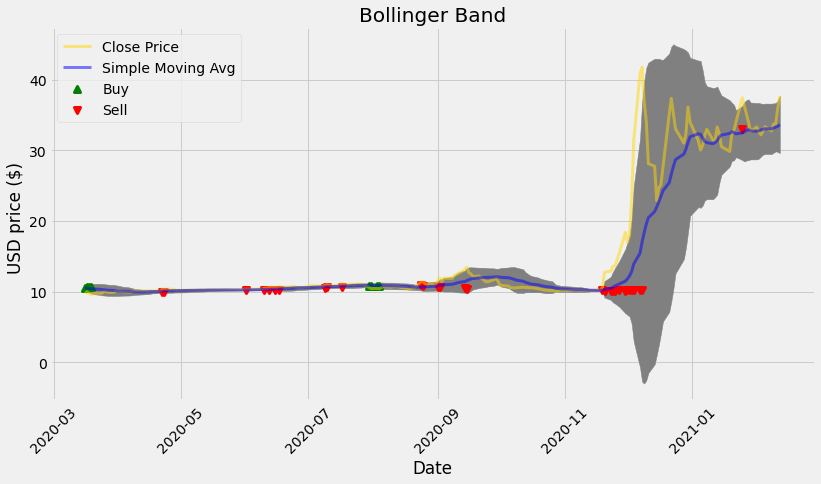

In [ ]:
# Plot and shade the area between two bollinger bands
fig = plt.figure(figsize=(12.2,6.4))
# Add the subplot 
ax = fig.add_subplot(1,1,1)
# get the index values of the data sub frame 
x_axis = new_df.index
# plot and shade the area between the upper band and the lower band grey
ax.fill_between(x_axis, new_df['Upper'], new_df['Lower'], color ='grey')
# plot the closing price and the moving avg.
ax.plot(x_axis, new_df['Close'], color = 'gold', lw = 3, label = 'Close Price', alpha = .5)
ax.plot(x_axis, new_df['SMA'], color = 'blue', lw = 3, label = 'Simple Moving Avg', alpha = .5)
ax.scatter(x_axis, new_df['Buy'], color = 'green', lw = 3, label = 'Buy', marker= '^', alpha = 1)
ax.scatter(x_axis, new_df['Sell'], color = 'red', lw = 3, label = 'Sell',  marker= 'v', alpha = 1)
# set the title and show the image
ax.set_title('Bollinger Band')
ax.set_xlabel('Date')
ax.set_ylabel('USD price ($) ')
plt.xticks(rotation = 45)
ax.legend()
plt.show()




